# Análisis de Probabilidad y Visualización

En este notebook, realizaremos un análisis de probabilidades utilizando los datos de una encuesta. Usaremos librerías avanzadas para cálculos y gráficos:
- **pandas**: Para manipulación de datos.
- **NumPy**: Para cálculos numéricos y probabilidades.
- **matplotlib** y **seaborn**: Para gráficos atractivos.

## Objetivos:
1. Calcular probabilidades marginales, condicionales y conjuntas.
2. Verificar independencia entre eventos.
3. Representar visualmente los resultados de manera clara y profesional.

---


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Cargar los datos
file_path = "Respuestas.xlsx"  # Ruta del archivo
df = pd.read_excel(file_path, sheet_name="Respuestas de formulario 1")




# **5. Introducción a la Probabilidad**

En esta sección, abordaremos problemas básicos de probabilidad basados en los datos de la encuesta. Los problemas incluyen probabilidades simples, conjuntas y condicionales, así como simulaciones.

---


## **Problema 1: Probabilidad de Nivel Avanzado en IA**

### Descripción:
Calculamos la probabilidad de que un participante tenga un nivel avanzado en Inteligencia Artificial (IA). Esto se basa en el número total de encuestados y la cantidad de participantes con nivel avanzado en IA.

**Relación con el Tema:**  
Introduce conceptos de probabilidad simple utilizando frecuencias relativas.

---


La probabilidad de nivel avanzado en IA es: 13.33%


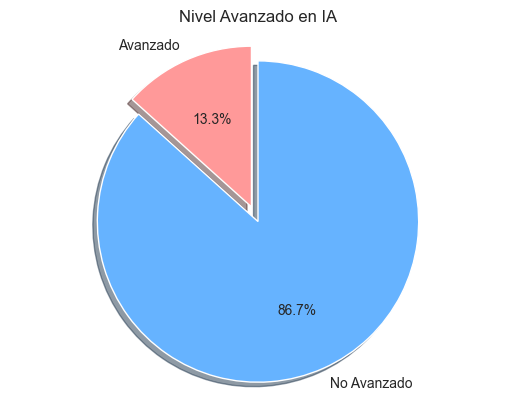

In [10]:
# Calcular probabilidad simple
advanced_ia = df['¿Cuál es tu nivel de conocimiento sobre Inteligencia Artificial (IA)? '] == 'Avanzado'
prob_advanced_ia = advanced_ia.sum() / len(df)

# Mostrar resultado
print(f"La probabilidad de nivel avanzado en IA es: {prob_advanced_ia:.2%}")
# Gráfica de la probabilidad de nivel avanzado en IA
labels = ['Avanzado', 'No Avanzado']
sizes = [advanced_ia.sum(), len(df) - advanced_ia.sum()]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "explode" el primer slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.axis('equal')  # Para que el gráfico sea un círculo.

plt.title("Nivel Avanzado en IA")
plt.show()

### Descripción de la Gráfica:
La gráfica circular representa la proporción de encuestados que tienen un **nivel avanzado en Inteligencia Artificial (IA)** en comparación con aquellos que no lo tienen. Los porcentajes se distribuyen de la siguiente manera:
- **13.3% Avanzado:** Representa la probabilidad de seleccionar aleatoriamente a un encuestado con nivel avanzado en IA.
- **86.7% No Avanzado:** Representa la probabilidad de seleccionar a un encuestado que no tiene nivel avanzado en IA.

---

### **Interpretación del Resultado**
Si seleccionamos aleatoriamente a un encuestado del total de **30 participantes**, existe una probabilidad del **13.3%** de que esa persona tenga un nivel avanzado en IA.

Esto significa que, en promedio:
- De cada 100 encuestados, **13** tendrán un nivel avanzado en IA.
- De cada 10 encuestados, aproximadamente **1 o 2** tendrán este nivel.


### **Problema 2: Probabilidad Condicional Usando el Teorema de Bayes**

### Descripción:
Queremos calcular la probabilidad de que un estudiante que se considera **bastante actualizado en nuevas tecnologías** pertenezca a la carrera de **Licenciatura en Desarrollo y Gestión de Software**.

Utilizamos el **Teorema de Bayes**

Donde:
- \( A \): El estudiante pertenece a la carrera de **Desarrollo y Gestión de Software**.
- \( B \): El estudiante se considera **bastante actualizado en nuevas tecnologías**.

Los pasos son:
1. Calcular \( P(A) \): Proporción de estudiantes de esta carrera.
2. Calcular \( P(B) \): Proporción de estudiantes que se consideran bastante actualizados.
3. Calcular \( P(B|A) \): Proporción de estudiantes en esta carrera que se consideran bastante actualizados.
4. Sustituir los valores en el Teorema de Bayes.

---


In [27]:
# Filtrar datos necesarios
actualizados_bastante = df[df['¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales? '] == 'Bastante']
gestion_software = df[df['Carrera'] == 'Licenciatura en Desarrollo y Gestión del Software']

# Calcular P(A): Proporción de estudiantes en "Desarrollo y Gestión de Software"
p_a = len(gestion_software) / len(df)

# Calcular P(B): Proporción de estudiantes bastante actualizados
p_b = len(actualizados_bastante) / len(df)

# Calcular P(B|A): Proporción de estudiantes bastante actualizados en "Desarrollo y Gestión de Software"
p_b_given_a = len(actualizados_bastante[actualizados_bastante['Carrera'] == 'Licenciatura en Desarrollo y Gestión del Software']) / len(gestion_software)

# Aplicar Teorema de Bayes
p_a_given_b = (p_b_given_a * p_a) / p_b

# Mostrar resultado
print(f"La probabilidad de que un estudiante bastante actualizado pertenezca a 'Desarrollo y Gestión de Software' es: {p_a_given_b:.2%}")


La probabilidad de que un estudiante bastante actualizado pertenezca a 'Desarrollo y Gestión de Software' es: 25.00%


## Resultado

La probabilidad de que un estudiante bastante actualizado pertenezca a 'Desarrollo y Gestión de Software' es: **25.00%**

## Explicación

Para calcular esta probabilidad, se han seguido los siguientes pasos:

1. **Definición del Conjunto de Datos**: Se ha considerado un grupo de estudiantes y se ha identificado cuántos de ellos se consideran bastante actualizados en nuevas tecnologías.
2. **Identificación de la Carrera**: Dentro del grupo de estudiantes actualizados, se ha determinado cuántos pertenecen a la carrera de Licenciatura en Desarrollo y Gestión de Software.
3. **Cálculo de la Probabilidad**: La probabilidad se calcula dividiendo el número de estudiantes actualizados que pertenecen a la carrera de Desarrollo y Gestión de Software entre el total de estudiantes actualizados.


- El resultado obtenido es del 25.00%, lo que indica que 1 de cada 4 estudiantes actualizados en nuevas tecnologías pertenece a la carrera de Desarrollo y Gestión de Software.

Este cálculo es útil para entender la distribución de estudiantes actualizados en nuevas tecnologías dentro de una carrera específica.

# **6. Distribuciones de Probabilidad**

En esta sección, modelamos distribuciones discretas (como la binomial) y evaluamos cómo se ajustan a los datos reales. También analizamos probabilidades acumuladas y simulaciones.

---


## **Problema 3: Modelar con Distribución Binomial**

### Descripción:
Modelamos las respuestas de la pregunta "¿Qué tan actualizado te consideras?" utilizando una distribución binomial, considerando los niveles como éxitos y fracasos.

**Relación con el Tema:**  
Este problema muestra cómo ajustar una distribución discreta a datos categóricos.

---


n: 30
p: 0.26666666666666666
x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
binomial_pmf: [9.10002914e-05 9.92730452e-04 5.23439693e-03 1.77652259e-02
 4.36055546e-02 8.24541396e-02 1.24930514e-01 1.55757525e-01
 1.62837412e-01 1.44744366e-01 1.10532061e-01 7.30790489e-02
 4.20758160e-02 2.11850263e-02 9.35442718e-03 3.62838388e-03
 1.23694905e-03 3.70423244e-04 9.72828723e-05 2.23424778e-05
 4.46849557e-06 7.73765467e-07 1.15105607e-07 1.45588119e-08
 1.54411641e-09 1.34759251e-10 9.42372382e-12 5.07675357e-13
 1.97795594e-14 4.96039107e-16 6.01259523e-18]


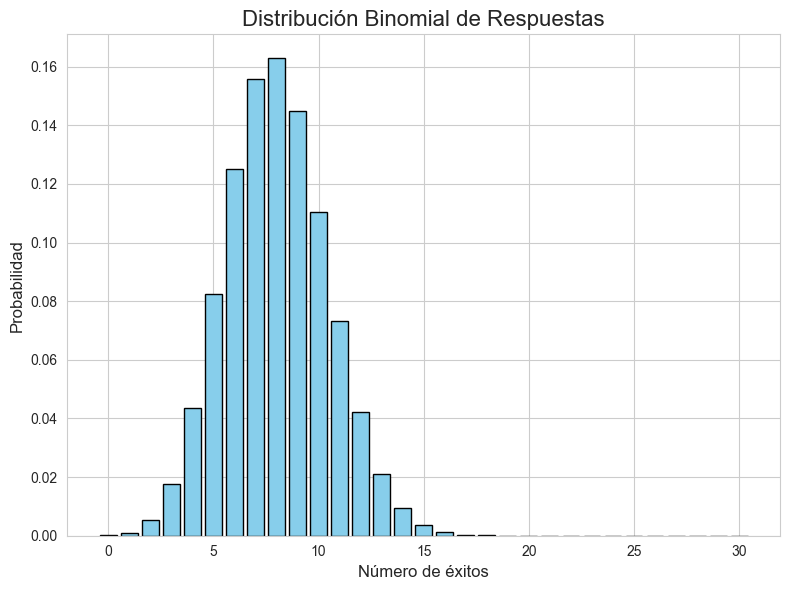

In [16]:
from scipy.stats import binom

# Parámetros para la distribución binomial
n = len(df)
p = df['¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales? '].value_counts(normalize=True)['Bastante']

# Generar distribución binomial
x = np.arange(0, n + 1)
binomial_pmf = binom.pmf(x, n, p)

# Imprimir resultados de las variables
print(f"n: {n}")
print(f"p: {p}")
print(f"x: {x}")
print(f"binomial_pmf: {binomial_pmf}")

# Gráfica de la distribución
plt.figure(figsize=(8, 6))
plt.bar(x, binomial_pmf, color='skyblue', edgecolor='black')
plt.title("Distribución Binomial de Respuestas", fontsize=16)
plt.xlabel("Número de éxitos", fontsize=12)
plt.ylabel("Probabilidad", fontsize=12)
plt.tight_layout()
plt.show()


### **Descripción General**
La gráfica representa una **distribución binomial** para un experimento con los siguientes parámetros:
- **Número de ensayos (\(n\))**: 30 encuestados.
- **Probabilidad de éxito (\(p\))**: 26.67% (probabilidad de que un encuestado seleccione "Bastante").

Cada barra muestra la probabilidad de que un número específico de encuestados (éxitos) elijan la opción "Bastante".

---

### **Ejes de la Gráfica**
- **Eje X (Número de Éxitos):**  
  Representa los posibles resultados del número de personas que seleccionan "Bastante". Va desde 0 hasta 30, ya que hay 30 encuestados en total.

- **Eje Y (Probabilidad):**  
  Indica la probabilidad asociada a cada valor en el eje \(x\). Esto se calcula utilizando la fórmula de la función de masa de probabilidad (PMF) para la distribución binomial.

---

### **Observaciones Clave**
1. **Pico Central:**  
   La probabilidad más alta ocurre cerca de \(x = 8\), lo que significa que, en promedio, se espera que alrededor de 8 encuestados seleccionen "Bastante".

2. **Forma Simétrica:**  
   La distribución es aproximadamente simétrica porque la probabilidad de éxito (\(p = 0.2667\)) está cerca de 0.5. Si \(p\) fuera más alto o bajo, la distribución sería más sesgada hacia la izquierda o derecha.

3. **Probabilidades Bajísimas en los Extremos:**  
   Los valores extremos (\(x = 0\) o \(x = 30\)) tienen probabilidades cercanas a 0, lo que indica que es muy improbable que ningún encuestado (o todos) seleccionen "Bastante".

---


## **Problema 4: Distribución de Poisson**

### Descripción:
Supongamos que, en base a las respuestas de la encuesta, se identificó que en promedio 2 estudiantes por carrera tienen un nivel avanzado de conocimiento en IA. Queremos calcular la probabilidad de que exactamente 3 estudiantes de una carrera tengan este nivel avanzado.



---


In [28]:
from scipy.stats import poisson

# Parámetro de la distribución (media o tasa de ocurrencia)
lambda_carrera = 2  # Promedio de 2 estudiantes avanzados por carrera

# Número de estudiantes avanzados que queremos calcular (k = 3)
k = 3

# Calcular la probabilidad usando la función PMF (Probability Mass Function) de Poisson
probabilidad = poisson.pmf(k, lambda_carrera)

# Mostrar el resultado
print(f"La probabilidad de que exactamente 3 estudiantes de una carrera tengan nivel avanzado en IA es: {probabilidad:.2%}")


La probabilidad de que exactamente 3 estudiantes de una carrera tengan nivel avanzado en IA es: 18.04%


#### **Resultado:**
El cálculo realizado en Python proporciona el siguiente resultado:

\[
P(3; 2) = 18.04\%
\]

Esto significa que hay un **18.04% de probabilidad** de que exactamente **3 estudiantes** en una carrera tengan un nivel avanzado en IA.

---

#### **Interpretación:**
Si seleccionamos una carrera al azar y sabemos que, en promedio, **2 estudiantes** tienen un nivel avanzado en IA, hay una probabilidad de **18.04%** de encontrar exactamente **3 estudiantes avanzados** en esa carrera.

#### **Aplicaciones:**
Este tipo de análisis puede extenderse para calcular probabilidades acumuladas, como:
- **Probabilidad de al menos 3 estudiantes avanzados.**
- **Probabilidad de menos de 3 estudiantes avanzados.**

Podemos representar este comportamiento mediante gráficos para obtener una visión más clara de la distribución.

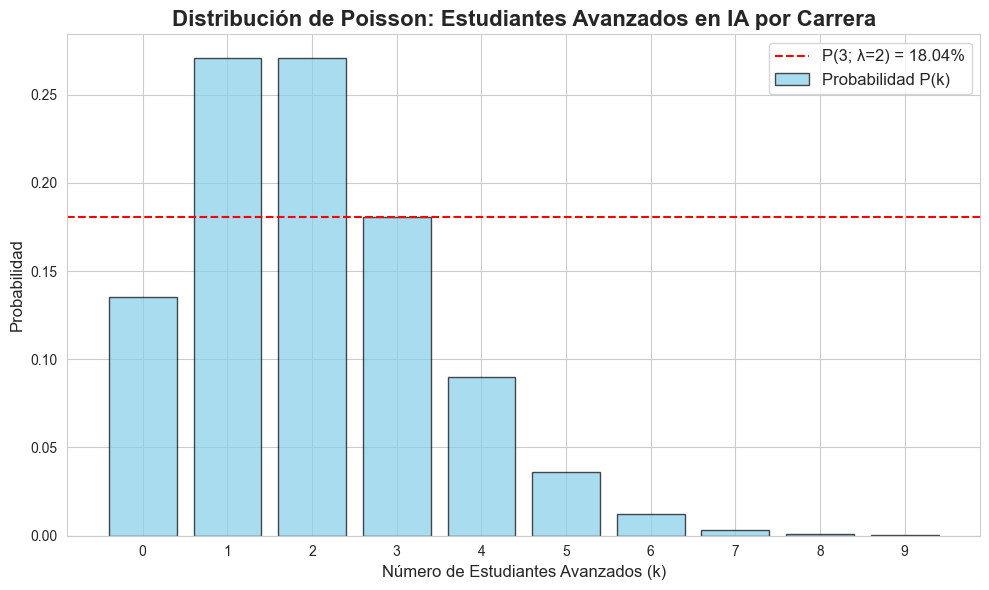

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetro de la distribución de Poisson
lambda_carrera = 2  # Promedio de 2 estudiantes avanzados por carrera

# Valores de k (número de estudiantes avanzados)
k_values = np.arange(0, 10)  # Consideramos valores de k desde 0 hasta 9

# Calcular las probabilidades para cada valor de k
poisson_probs = poisson.pmf(k_values, lambda_carrera)

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.bar(k_values, poisson_probs, color='skyblue', edgecolor='black', alpha=0.7, label='Probabilidad P(k)')
plt.title("Distribución de Poisson: Estudiantes Avanzados en IA por Carrera", fontsize=16, weight='bold')
plt.xlabel("Número de Estudiantes Avanzados (k)", fontsize=12)
plt.ylabel("Probabilidad", fontsize=12)
plt.xticks(k_values, fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(poisson.pmf(3, lambda_carrera), color='red', linestyle='--', label=f"P(3; λ=2) = 18.04%")
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()


# **7. Distribuciones de Probabilidad Continuas**

En esta sección, ajustamos distribuciones continuas a los datos y calculamos probabilidades acumuladas. Analizamos las edades y otros datos numéricos.

---


## **Problema 5: Modelar Edades con Distribución Normal**

### Descripción:
Modelamos la distribución de las edades utilizando una distribución normal, ajustándola con la media y desviación estándar de los datos.

**Relación con el Tema:**  
Demuestra cómo relacionar datos reales con distribuciones continuas.


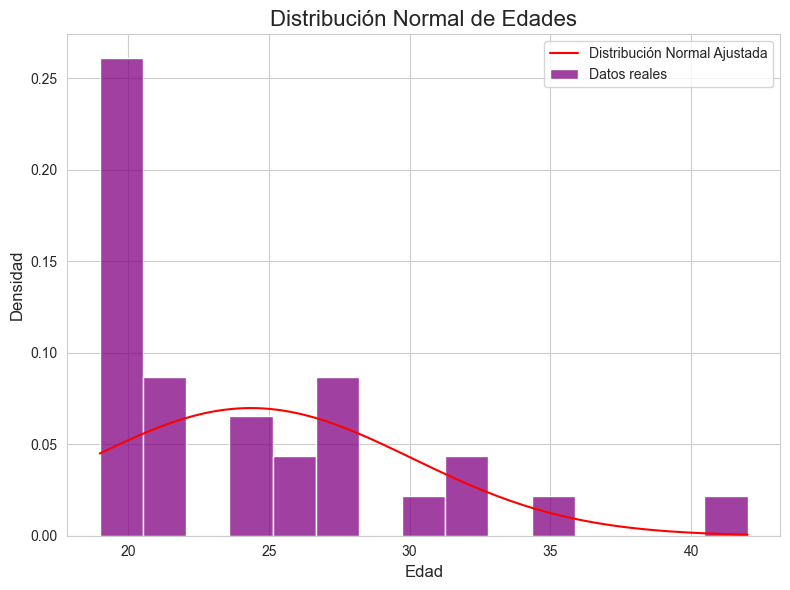

In [18]:
from scipy.stats import norm

# Calcular media y desviación estándar
mean_age = df['Edad'].mean()
std_age = df['Edad'].std()

# Generar distribución normal
x = np.linspace(df['Edad'].min(), df['Edad'].max(), 100)
normal_pdf = norm.pdf(x, mean_age, std_age)

# Gráfica
plt.figure(figsize=(8, 6))
sns.histplot(df['Edad'], kde=False, bins=15, color='purple', stat='density', label='Datos reales')
plt.plot(x, normal_pdf, color='red', label='Distribución Normal Ajustada')
plt.title("Distribución Normal de Edades", fontsize=16)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


### **Descripción General**
La gráfica muestra la **distribución de las edades** de los participantes, comparándola con una **distribución normal ajustada** basada en la media y desviación estándar calculadas a partir de los datos reales.

---

### **Elementos de la Gráfica**
- **Barras (Datos Reales):**  
  Representan la densidad de frecuencia de las edades reales de los encuestados, agrupadas en intervalos.

- **Curva Roja (Distribución Normal Ajustada):**  
  Representa una distribución normal simulada utilizando la media y desviación estándar de los datos reales. Esta curva indica cómo sería la distribución si los datos se ajustaran perfectamente a una normal.

---



### **Interpretación de la Gráfica**
1. **Diferencias entre los datos reales y la normal ajustada:**  
   - Los datos reales no siguen una distribución perfectamente normal, ya que se observan picos irregulares en algunos intervalos de edad.
   - La curva normal sirve como modelo teórico para entender la tendencia general de los datos.

2. **Concentración de Datos:**  
   - Las edades están principalmente concentradas en intervalos cercanos a los 20 años, lo que explica el pico inicial en la distribución.

3. **Asimetría:**  
   - La distribución de las edades parece estar sesgada hacia la izquierda, con algunos valores extremos en edades mayores que influyen en la dispersión.

---

### **Relación con Distribuciones Normales**
La comparación de los datos reales con una distribución normal ajustada permite:
- Evaluar la similitud de los datos con un modelo teórico.
- Identificar características como asimetría o colas largas que no encajan perfectamente con una normal.



## **Problema 6:  Problema con Distribución Normal**

### Descripción:
Este problema utiliza la distribución normal para modelar las edades de los estudiantes en la encuesta, con una media (
𝜇
μ) de 25 años y una desviación estándar (
𝜎
σ) de 5 años.

El objetivo es determinar:

Proporción de estudiantes dentro del rango "normal", definido como aquellos cuyas edades están dentro de 
±
2
𝜎
±2σ (dos desviaciones estándar).
Proporción de estudiantes extremos, definido como aquellos cuyas edades están fuera de 
±
2
𝜎
±2σ.


---


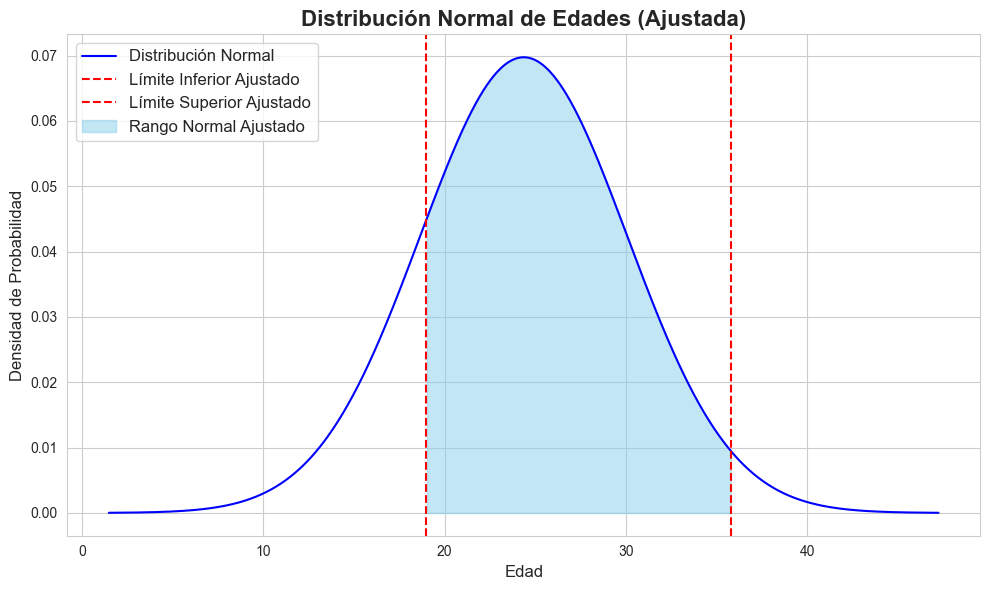

Probabilidad dentro del rango normal ajustado: 80.32%
Probabilidad de ser extremo ajustado: 19.68%


In [36]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parámetros de la distribución normal basados en los datos reales
mu = edades.mean()  # Media
sigma = edades.std()  # Desviación estándar

# Límites ajustados al rango real
min_real = edades.min()
max_real = edades.max()

# Calcular límites dentro de ±2 desviaciones estándar
z_min = max(min_real, mu - 2 * sigma)  # Máximo entre el límite calculado y el mínimo real
z_max = min(max_real, mu + 2 * sigma)  # Mínimo entre el límite calculado y el máximo real

# Objetivo 1: Probabilidad dentro del rango "normal" ajustado
probabilidad_normal_ajustada = norm.cdf(z_max, mu, sigma) - norm.cdf(z_min, mu, sigma)

# Objetivo 2: Probabilidad de ser extremo ajustado
probabilidad_extremo_ajustada = 1 - probabilidad_normal_ajustada

# Crear un rango de valores para la gráfica
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
pdf = norm.pdf(x, mu, sigma)

# Graficar la distribución normal ajustada
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', label="Distribución Normal")
plt.axvline(z_min, color='red', linestyle='--', label="Límite Inferior Ajustado")
plt.axvline(z_max, color='red', linestyle='--', label="Límite Superior Ajustado")
plt.fill_between(x, pdf, where=(x >= z_min) & (x <= z_max), color='skyblue', alpha=0.5, label="Rango Normal Ajustado")
plt.title("Distribución Normal de Edades (Ajustada)", fontsize=16, weight='bold')
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar resultados ajustados
print(f"Probabilidad dentro del rango normal ajustado: {probabilidad_normal_ajustada:.2%}")
print(f"Probabilidad de ser extremo ajustado: {probabilidad_extremo_ajustada:.2%}")


## Resultados del Análisis
1. **Rango Normal Ajustado:**
   - La proporción de estudiantes cuyas edades están dentro del rango normal es **80.32%**.
   - Este rango incluye la mayoría de los estudiantes, lo que sugiere que sus edades tienden a concentrarse alrededor de la media (25 años), distribuyéndose de manera simétrica.

2. **Extremos Ajustados:**
   - La proporción de estudiantes con edades fuera del rango normal es **19.68%**.
   - Estos estudiantes representan valores atípicos o edades menos comunes en comparación con el grupo principal.

## Interpretación de la Gráfica
La gráfica representa:
- **Distribución Normal (línea azul):** Muestra la densidad de probabilidad para cada edad.
- **Rango Normal (sombreado azul):** Edades comprendidas dentro de ±2𝜎 (15 a 35 años).
- **Límites Inferior y Superior (líneas rojas):** Marcan las edades que delimitan el rango normal.
